# Converting Article From Text to Speech

## Problem Description

>From here  main aim is to analyze the sentiments of people's about AI ,weather we have to afraid of AI or not . 

## Importing Libraries

In [1]:
import string
from collections import Counter
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import GetOldTweets3 as got
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
G:\DOWNLOADS\Programs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
G:\DOWNLOADS\Programs\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading article

In [2]:
#Get an article
text = open('article.txt', encoding="utf-8").read()
lower_case = text.lower()
# str.maketrans removes any punctuations 
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words
tokenized_words = word_tokenize(cleaned_text, "english")

## Removing Stop words

In [3]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [4]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [5]:
len(lemma_words)

772

## Analysing Peoples' sentiment about AI

In [6]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 ['exposed', ' independent', ' sad', ' adequate', ' fearless', ' average', ' fearful', ' esteemed', ' independent', ' fearful', ' free', ' happy', ' anxious'] 
 

Count of each emotion 
 Counter({' independent': 2, ' fearful': 2, 'exposed': 1, ' sad': 1, ' adequate': 1, ' fearless': 1, ' average': 1, ' esteemed': 1, ' free': 1, ' happy': 1, ' anxious': 1})


## Visualising Sentiments

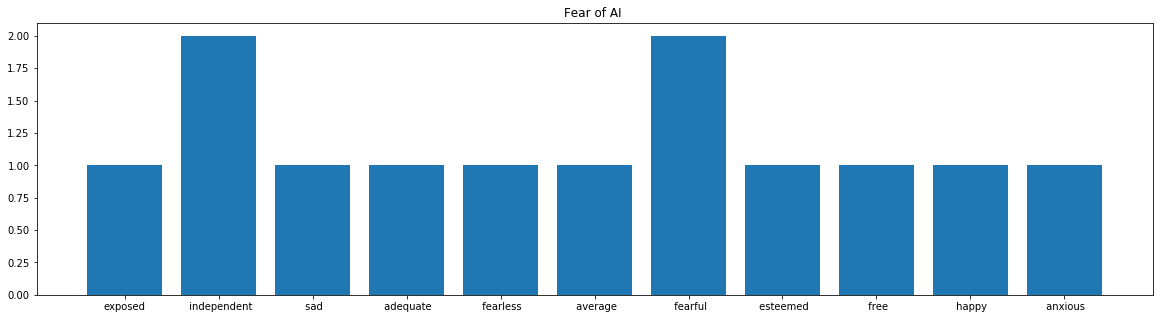

In [7]:
plt.figure(figsize=(20,5))
plt.bar(*zip(*w.items()))
plt.title("Fear of AI ")
plt.show()

>From above we can observe that most of the people's are afraid about AI ,because of loosing their jobs due to AI and Automation.And some of them are looking to start their own company to ake them self in indeoendent .